<img style="float: center" src="https://arrupesj.files.wordpress.com/2015/06/4.jpg" width="350px" height="125px" />


# $$Proyecto$$
### $$Ley    de    enfriamiento    de   Newton $$
#### $$Profesor: Carlos Arellano Muro$$
#### $$Equipo: $$
#### $$Diamante del Cielo Gutierrez Nandayapa - nt709910$$
#### $$Isaura Rodriguez Navarro - nt713994$$
##### $$Fecha: 03 de diciembre de 2020$$

### Objetivos
> #### 1.1 Objetivos generales.
>  - Aplicar los conocimientos aprendidos en la materia en resolución de ecuaciones diferenciales.
>  - Comprender la Ley de enfriamiento de Newton.

> #### 1.1 Objetivos específicos.#

>  - Obtener la solución analítica utilizando la librería sympy.
>  - Obtener la solución númerica con la función.
>  - Interpretar los resultados obtenidos.

## $$Planteamiento$$

La razón de cambio de temperatura de un objetivo, es proporcional a la difrencia de su temperatura y la del ambiente.

$T(t)$: Temperatura del objeto en t

$T_A$: Temperatura Ambiente (constante)

$T'(t)$ : Razón de cambio de la temperatura  

$$T'(t) = k(T(t)-T_A)$$

$$T'=k(T-T_A)$$

\begin{equation}
\frac{dT}{dt} = {k}(T-T_A)
\end{equation}

Donde:


$T$ es la temperatura del objeto a analizar

$T_A$ es la temperatura del medio que lo rodea 

$k$ representa la constante de la proporcionalidad del cambio entre $T$ y $T_A$

Ingeniería, medicina y metereología son algunas de la áreas de aplicación.
Ejemplos de éstas son modelos climáticos para el cálculo de la evolución de la temperatura en la atnósfera, para conocer el comportamineto de componentes electrónicos en distintos ambientes, para determinar el tiempo de vida de un procesador, sistemas de refrigeración con líquidos, en medicina forense para saber el tiempo que lleva un cadáver.

In [1]:
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

 **Se obtiene la solución analítica**

In [2]:
sp.var('t') 
sp.var('k')
sp.var('Ta')
T=sp.Function('T')
eq=sp.Derivative(T(t),t)-k*(T(t)-Ta) 
solucion=sp.dsolve(eq,T(t))
solucion

Eq(T(t), C1*exp(k*t) + Ta)

##### Se caliente una placa expuesta al Sol

En este proyecto se enfoca en el flujo de calor de metales semiconductores o conductores, que es para la elaboración de termo-planares cuyo fin es capatar energía y convertirla en energía eléctrica u otro tipo de energía diferente al calor

Intensidad de la radiación solar  I=700  $ \frac{W}{m^2} $ 

Temperatura ambiente $T0=20°C$

Espesor de la placa $g=2 mm$

Material aluminio: ρ=2700 $\frac{kg}{m^3}$ y c=880 $\frac{J}{kg°C}$

Se ilumina la placa, al cabo de $1200 s$ alcanza una temperatura de $T_f=71.3 °C$

Se deja de iluminar la placa, se pone el contador de tiempo a cero, y al cabo de $t=1000 s$ la temperatura ha bajado a $23.2 °C$

Conocida la temperatura inicial $T_f =71.3°C$ y al cabo de un tiempo $t=1000 s$, $T=23.2°C$ durante el enfriamiento calculamos la constante $k$.

Se obtiene la siguiente ecuación:

$$T(t)= T_0 + (T_f-T_0) e^{-kt}$$

se despeja la k y se obtiene:

$$k=\frac{ln\frac{T(t)-T_0}{T_f-T_0}}{-t}$$

In [3]:
T=23.20
T0=20
Tf=71.3
t=1000

In [4]:
def C1(T0,Tf):
    return (Tf-T0)

In [5]:
C1(20,71.3)

51.3

In [6]:
def K(T,Tf,t,T0):
    C1=(Tf-T0)
    return (np.log((T-T0)/C1))/-t

In [7]:
K(23.20,71.3,1000,20)

0.002774539942371043

In [8]:
sp.var('t')
k=0.0028
Ta=20
C1=(Tf-T0)
solucion.subs('C1',C1).subs('Ta',Ta).subs('k',-k)

Eq(T(t), 20 + 51.3*exp(-0.0028*t))

En que momento la temperatura se encontró a $50 °C$ en la placa de aluminio

Se obtiene la siguiente ecuación:

$$T(t)= T_0 + (T_f-T_0) e^{-kt}$$

se despeja la k y se obtiene:

$$t = \frac{-1}{k} ln\frac{T(t)-T_0}{T_f-T_0}$$

In [17]:
k=0.0028
T=50
T0=20
Tf=71.3
def t(T,Tf,k,T0):
    C1=(Tf-T0)
    d=-(1/k)
    t=np.log(abs((T-T0)/C1))*d
    return t

In [18]:
t(50,71.3,0.0028,20)

191.60477518377442

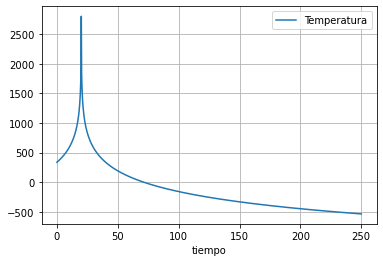

In [19]:
tempt=np.linspace(0,250,1000)
plt.plot(tempt,t(tempt,71.3,0.0028,20),label='Temperatura')
plt.legend(loc='best')
plt.xlabel('tiempo')
plt.grid()

In [12]:
k

0.0028

In [13]:
T0

20

In [14]:
def Tt(t,Tf):
    return T0+(Tf-T0)*np.exp(-k*t)
sol2=solve_ivp(Tt,(71.3,1000),[0.2],max_step=0.01)

In [15]:
sol2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 557228
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  71.3 ,   71.31,   71.32, ...,  999.99, 1000.  , 1000.  ])
 t_events: None
        y: array([[2.00000000e-001, 2.37990569e-001, 2.76298111e-001, ...,
        1.88488173e+118, 1.88602829e+118, 1.88602829e+118]])
 y_events: None

In [16]:
sol2.y

array([[2.00000000e-001, 2.37990569e-001, 2.76298111e-001, ...,
        1.88488173e+118, 1.88602829e+118, 1.88602829e+118]])

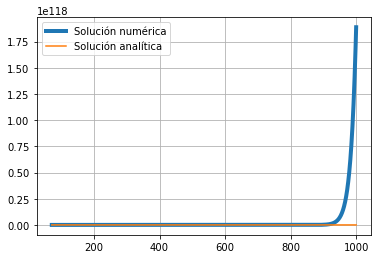

In [18]:
plt.plot(sol2.t,sol2.y[0,:],label='Solución numérica',lw=4) # lw=linewidth
plt.plot(sol2.t,t(sol2.t,71.3,0.0028,20),label='Solución analítica')
plt.legend(loc='best')
plt.grid()

### Interpretación de resultados 


Se obtuvo la solución análitica de la ecuación diferencial que se presenta en la Ley de enfriamiento de Newton, obteniendo:

$$𝑇(𝑡)= 𝐶_1 𝑒^{𝑘𝑡} + 𝑇𝑎$$

A partir del planteamiento del problema, que es el calentamiento y enfriamiento de una placa de aluminio, con las siguientes condiciones iniciales:

 𝑇𝑓=71.3°𝐶,  𝑡=1000𝑠 ,  𝑇=23.2°𝐶 , T0=20°C y k desconocida
 
 Se realiza el procedimiento correspondiente para el calculo de k y se obtiene $k=0.0028$
 
 Se plantea la relación de la ecuación con la solución analítica y se obtuvo la siguiente ecuación:
 
 $$𝑇(𝑡) = 20 + 51.3𝑒^{−0.0028𝑡} .... ec 1$$
 
 Se aplica a lo obtenido el calculo del tiempo correspondiente cuando la placa se encuentra a $50°C$ y se obtiene $191 s$
 
 Se obtuvo del despeje de la ec 1 y se obtuvo:
 
$$t = \frac{-1}{k}ln\frac{T(t)-T_0}{T_f-T_0}$$
 
 Al realizar las graficas de la solución numérica y analítica respecto al estado de enfriamiento y calentamiento de la placa de aluminio, se puede observar en la primer grafica que hay un decrecimiento de la temperatura respecto al tiempo, lo que nos indica que se encuentra en proceso de enfriamiento la placa.
 
 En la segunda gráfica se puede observar que hay un crecimiento exponencial respecto al tiempo de la temperatura,también se puede ver el comportamiento constante del calentamiento hasta cierto tiempo en donde hay crecimiento, ésta gráfica es del calentamiento de la placa.

### Conclusión

Se puede concluir que la Ley de enfriamiento de Newton no únicamente aplica al flujo de calor en fluidos sino también en sólidos de ciertos metales semiconductores o conductores, en este caso analizando una placa de metal.

El comportamiento de las graficas concuerda con el proceso del flujo del calor en un enfriamiento y un calentamiento, las soluciones obtenidas desde la analítica como la numérica concuerdan con el modelo matemático del problema planteado.

Se aplicaron los conocimientos que se han obtenido a lo largo del curso, se obtuvo la solución analítica de la ecuación diferencial a partir de la librería de sympy y la solución númerica a partir de ecucaciones aplicadas y de solve.ivp.

Se genero la interpretación de los resultados obtenidos de la simulación y se aplica a dispositivos de captación y conversión de energía (ej. termo planar). 

### Referencias

Gil S., Mayochi M., Pelliza L. J., Experimental estimation of the luminosity of the Sun. Am. J. Phys. 74 (8) August 2006, pp. 728-733